In [1]:
#Using codes 61-72

#STEP 0: IMPORTING LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

#STEP 1: LOADING INPUT DIRECTORY
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#STEP 2: READING CSV FILE
dset = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")

#STEP 3: SWITCHING TO SHAPED VERSION OF THE CSV

dset.to_csv("DIY Loan Predictor Shaped.csv")
dset = pd.read_csv("/kaggle/working/DIY Loan Predictor Shaped.csv")

#STEP 4: DROPPING UNNECESSARY COLUMNS

dset = dset.drop("Id", axis = 1)
dset = dset.drop("STATE", axis=1)
dset = dset.drop("CURRENT_HOUSE_YRS", axis = 1)
dset = dset.drop("CURRENT_JOB_YRS", axis = 1)
dset = dset.drop("Unnamed: 0", axis = 1)

#STEP 5: CHECKING FOR NULL VALUES

dset.isnull().sum()

#STEP 6: IDENTIFIYING AND HANDLING UNIQUE VALUES

dset['Married/Single'].unique()
dset['House_Ownership'].unique()
dset['Car_Ownership'].unique()
dset['Profession'].unique()
dset['CITY'].unique()

#STEP 7: ENCODING CATGORICAL VARIABLES INTO NUMERICAL REPRESENTATIONS

enc = LabelEncoder()
catCols = ['Married/Single','House_Ownership','Car_Ownership']
for cols in catCols:
    dset[cols] = enc.fit_transform(dset[cols])
    
dset.info()

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Income           252000 non-null  int64 
 1   Age              252000 non-null  int64 
 2   Experience       252000 non-null  int64 
 3   Married/Single   252000 non-null  int64 
 4   House_Ownership  252000 non-null  int64 
 5   Car_Ownership    252000 non-null  int64 
 6   Profession       252000 non-null  object
 7   CITY             252000 non-null  object
 8   Risk_Flag        252000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.3+ MB


In [2]:
#STEP 8: SPLITTING THE RISK FACTOR

Y = dset["Risk_Flag"]
X = dset.drop("Risk_Flag",axis = 1)
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY
0,1303834,23,3,1,2,0,Mechanical_engineer,Rewa
1,7574516,40,10,1,2,0,Software_Developer,Parbhani
2,3991815,66,4,0,2,0,Technical_writer,Alappuzha
3,6256451,41,2,1,2,1,Software_Developer,Bhubaneswar
4,5768871,47,11,1,2,0,Civil_servant,Tiruchirappalli[10]


In [3]:
#STEP 9: LISTING THE RISK FACTOR IN A DATAFRAME

Y=pd.DataFrame(Y)
Y.head()

,Risk_Flag
0,0
1,0
2,0
3,1
4,1


<Axes: >

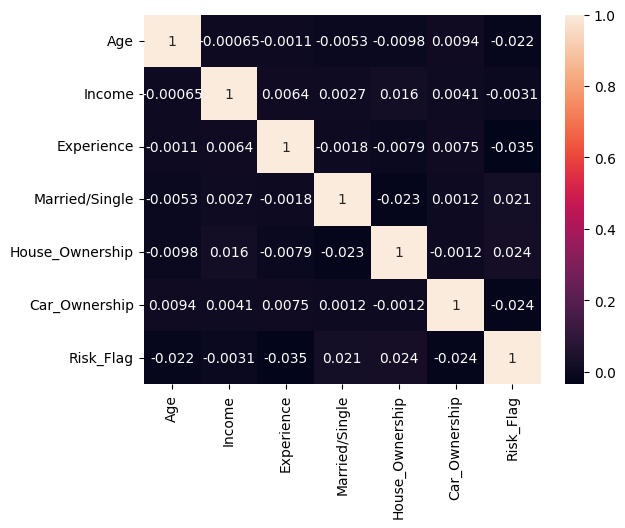

In [4]:
#STEP 10: CREATING THE CORRELATION HEAT MAP

numeric_cols = ['Age', 'Income', 'Experience','Married/Single','House_Ownership','Car_Ownership','Risk_Flag']  # Assuming numerical columns

# Create the heatmap
sns.heatmap(dset[numeric_cols].corr(),annot=True)

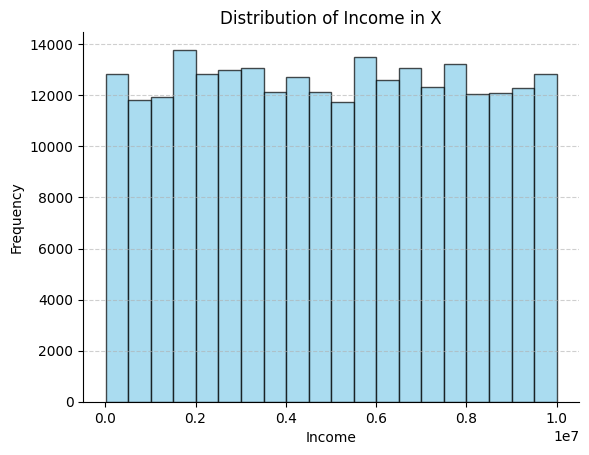

In [5]:
#STEP 11: CREATING THE INCOME RANGE FREQUENCY HISTOGRAM

# Assuming X is your DataFrame
income_data = X['Income']  # Extract the income data

# Customize the histogram
plt.hist(income_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # Adjust bins, color, and transparency

# Customize axes and labels
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income in X')

# Customize gridlines and spines
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add gridlines to y-axis
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines

plt.show()



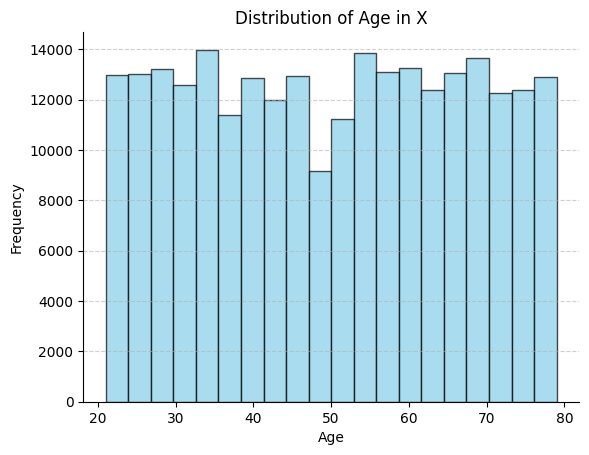

In [6]:
#STEP 12: CREATING THE AGE RANGE FREQUENCY HISTOGRAM
age_data = X['Age']  #Extract the age data

# Create the histogram with customizations
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Customize axes and labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in X')

# Customize gridlines and spines
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


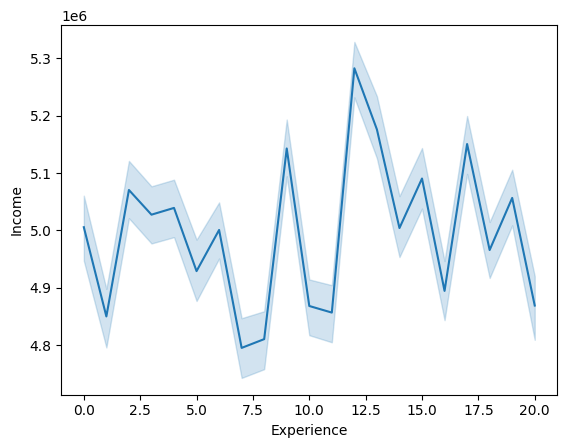

In [7]:
#STEP 13: CREATING A LINEPLOT FOR THE INCOME/EXPERIENCE RELATIONSHIP
sns.lineplot(data=dset, x="Experience", y="Income")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


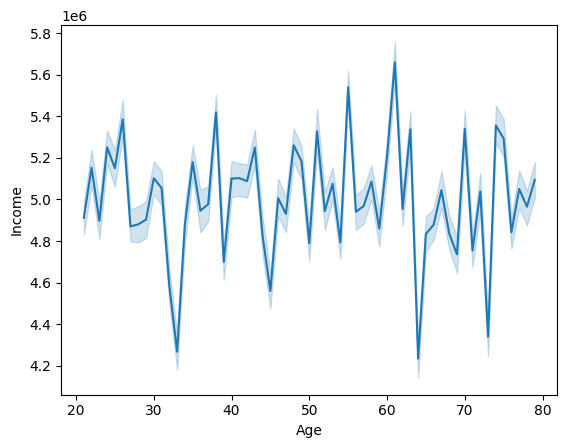

In [8]:
#STEP 14: CREATING A LINEPLOT FOR THE AGE/INCOME RELATIONSHIP
sns.lineplot(data=dset, x="Age", y="Income")
plt.show()

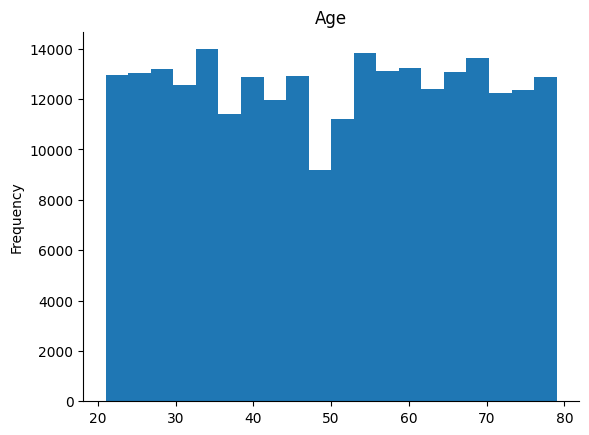

In [9]:
#STEP 15: CREATING A PLOT FOR THE AGE FREQUENCY
dset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

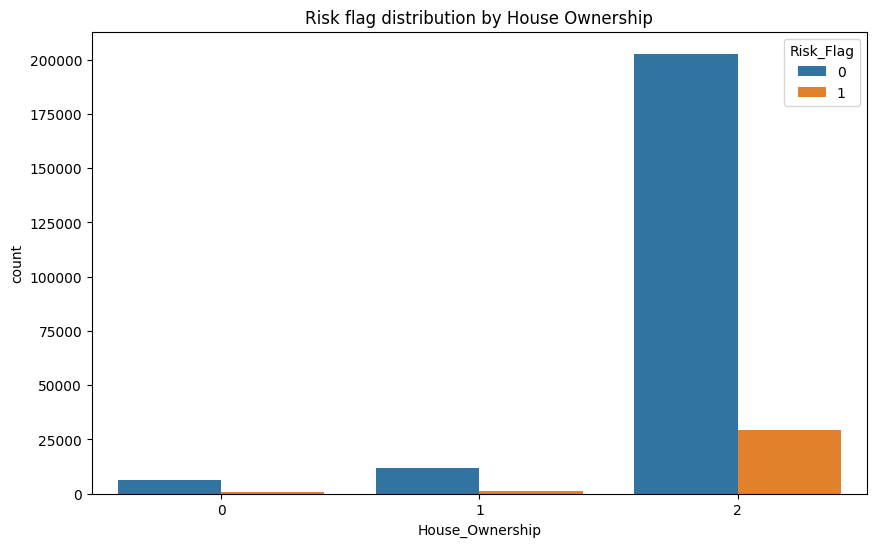

In [10]:
# STEP 16: CREATING A COUNT PLOT FOR THE RISK FLAG/HOUSE OWNERSHIP RELATIONSHIP
plt.figure(figsize=(10, 6))
sns.countplot(x="House_Ownership", hue="Risk_Flag", data=dset)
plt.title("Risk flag distribution by House Ownership")
plt.xticks(rotation=0)
plt.show()